### Chapter 4.5 
# M/M/1/K-PS System

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---
A processor sharing (PS) system with limited capacity $ K $ is considered, in which the jobs in the system fairly share the capacity of a single server. The system state $X$ describes the number of customers in the system. The server can serve a maximum of $ K $ jobs at the same time. If all $ K $ places in the system are occupied, incoming requests are rejected. So there is no waiting space in the system and customers do not experience waiting times: incoming requests are served immediately if there are fewer than $K$ requests in the system ($ X < K $); incoming requests are blocked if $ X = K $. The arrival process is a Poisson process with rate $ \lambda $.

The capacity of the server is $ C $. If there are $ 0 <i <K $ jobs in the system, each job has the capacity $ C_i = C / i $. The service demand (job size) of a job follows an exponential distribution $ B \sim \mathrm{EXP}(\mu) $. If one job were to use the server alone, the service time would be $ B / C $. As an example, let $ B $ be the file size and $ C $ the bandwidth with which the server transmits the file.

The system is represented in Kendall notation with M/M/1/K-PS, although there are no waiting places. But M/M/1/K indicates that we have a delay-loss system. The response time and blocking depends on the number of concurrent customers in the system. Alternatively, the system can also be seen as an M/M/K-0 system with state-dependent service rates.


## Analysis of the System
The M/M/1/K-PS system in a Markovian system, i.e. the state process has the Markov property. The number $ X $ of jobs (or customers) in the system is regarded as the state of the system. In order to analyze the state probabilities, we first consider the transition rates of the system. The system represents a birth-and-death process.
! [State transition diagram of the M / M / 1 / K-PS system] (MM1K-PS.png)

The transition rate from $ [X=i] $ to $[X= i + 1] $ corresponds to the arrival rate $ \lambda $. In the state $ i $, a single user has an service time of $ B / C_i = i \cdot B / C $ with a corresponding service rate $ \mu_i^* = \frac{C}{i E[B]} $. All users together then have the transition rate $\mu_i = i \cdot \mu_i^* = \frac{C}{E[B]} = \mu $, and we define $ \mu = C / E[B] $. When transitioning from $ [X=i] $ to $ [X= i-1] $, the transition rate is therefore independent of $ i $:

$ \mu_i = \mu \quad \text{for} \quad i = 1, \dots, K $.

The state probability is $ P(X = i) = x(i) $.
The macro state equations are: 

$ \lambda x (i) = \mu x (i + 1) $ for $ i = 0, \dots K-1 $. 

With the offered load $ a = \lambda / \mu $, we obtain:

$ x (i) = \lambda / \mu \cdot x(i-1) = a \cdot x(i-1) = a ^ i \cdot x ( 0) $. 

The probability for $ x (0) $ can be calculated as follows.

$1 = \sum_{i=0}^K x(i) = \sum_{i=0}^K a^i x(0) = x(0) \sum_{i=0}^K a^i = x(0) \frac{1-a^{K+1}}{1-a} \quad \Rightarrow \quad x(0) = \frac{1-a}{1-a^{K+1}}$

## Blocking Probability
Due to the PASTA property, the blocking probability is

$p_B = x(K) = a^K x(0) = a^K \frac{1-a}{1-a^{K+1}} = \frac{a^K-a^{K+1}}{1-a^{K+1}}$

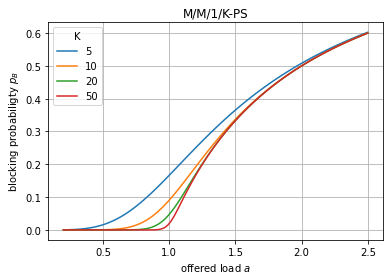

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def x0(a=1, K=10):
    return (1-a)/(1-a**(K+1))

def pb(a=1, K=10):
    return a**K*x0(a,K)

a = np.linspace(0.2, 2.5, 100)

for k in (5, 10, 20, 50):
    plt.plot(a, pb(a=a, K=k), label=k)

plt.grid()
plt.xlabel('offered load $a$')
plt.ylabel('blocking probabiligty $p_B$')
plt.legend(title='K');
plt.title('M/M/1/K-PS');

## Mean Response Time
The mean response time can be derived using Little's theorem. First, let's look at the average number of jobs in the system.

$E[X]=\sum_{i=0}^K i \cdot x(i) = \sum_{i=0}^K i \cdot a^i \cdot x(0) = x(0) \frac{a(Ka^{K+1}-(K+1)a^K+1)}{(1-a)^2} = \frac{a(Ka^{K+1}-(K+1)a^K+1)}{(1-a)(1-a^{K+1})}$

which is simplified to:
$
E[X] = \frac{K+1}{a^{K+1}-1} + \frac{1}{1-a} + K
$.

According to Little's law, $E[X] = \lambda^* \cdot E[T] $ and thus the mean response time is $ E[T] = E[X] / \lambda^* $ with $ \lambda^*=(1-p_B)\lambda$ being the arrival rate of non-blocked requests.

$
E[T] = \frac{E[X]}{\lambda^*} = \frac{E[X]}{\lambda(1-p_B)}
$

Finally:

$
E[T] = \frac{((a-1) K-1) a^{K+1}+a}{\lambda (1-a) \left(1-a^K\right)}$ for M/M/1/K-PS.


Note that for a M/M/1-PS system, i.e. with infinite space and therefore without blocking, the mean sojourn time is 

$E[T] = \frac{1}{C\mu-\lambda}$ for M/M/1-PS. However, it must be ensured that $\lambda/(C\mu)<1$ (stability condition).


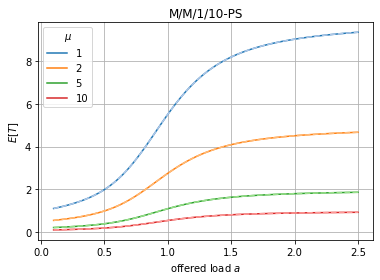

In [19]:
def ET(lam=1, mu=1, K=10): # using simplifed expression for E[T]
    a = lam/mu    
    return (a + a**(1 + K)*(-1 + (-1 + a)*K))/((-1 + a)*(-1 + a**K)*lam)

def ET2(lam=1, mu=1, K=10): # computation of the sum E[X]
    a_vec = lam/mu
    i = np.arange(0,K+1)    
    myEX = np.array([x0(a=a, K=K)*sum(i * a**i) for a in a_vec ])
    return myEX/(lam*(1-pb(a=a, K=K)))

K = 10
a = np.linspace(0.1,2.5,100)
mu_vec = (1, 2, 5, 10)

for i,mu in enumerate(mu_vec):
    lam = a*mu    
    plt.plot(a, ET(lam=lam, mu=mu, K=K), label=mu, color=plt.cm.tab20(2*i))
    plt.plot(a, ET2(lam=lam, mu=mu, K=K), '--', color=plt.cm.tab20(2*i+1))

plt.grid()
plt.xlabel('offered load $a$')
plt.ylabel('$E[T]$')
plt.legend(title='$\mu$');
plt.title(f'M/M/1/{K}-PS');